# Create ML module  for Admission_Predict

## DataSet Overview

-  All data come from one source which was csv file from kaggle shared in the same folder and contains details in columns as following.
    - Serial No.: Serial number of each student    
    - GRE Score:  GRE General Test Scores (out of 340) 
    - TOEFL Score:    TOEFL Test Score (out of 120) 
    - University Rating:  University Rating from 0 to 5
    - SOP:  Statement of Purpose from 0 to 5
    - LOR:  Letter of recommendation from 0 to 5
    - CGPA:  Culmulative undergraduate Grade Point Average (out of 10)  
    - Research: Research experience from 0 to 1
    - Chance of Admit:  Chance of Admission from 0 to 1
    

In [19]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Data Visualization
sns.set() # Set seaborn plot style as defualt 

In [2]:
# Importing the dataset
dataset = pd.read_csv('Admission_Predict.csv')

In [3]:
# Display Frist 5 rows from dataframe
dataset.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Information about data shape and types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Comment:
Data Looks clean and no missing or NULL records

In [5]:
#brief of the data summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


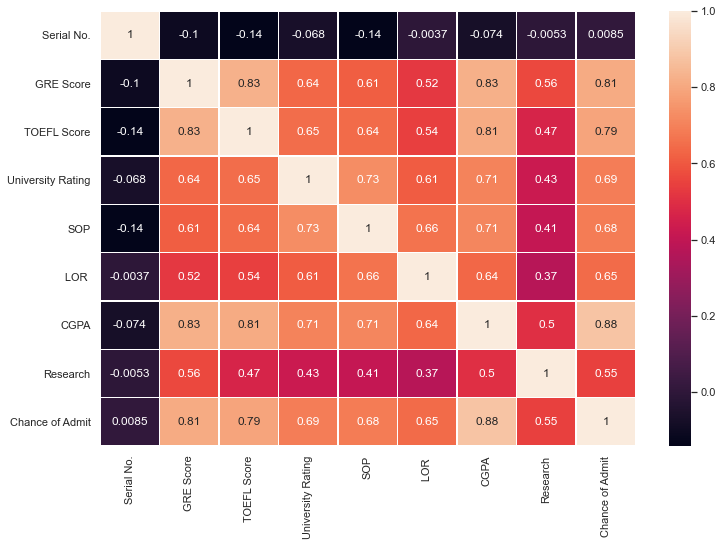

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),annot=True,linewidths=.5)

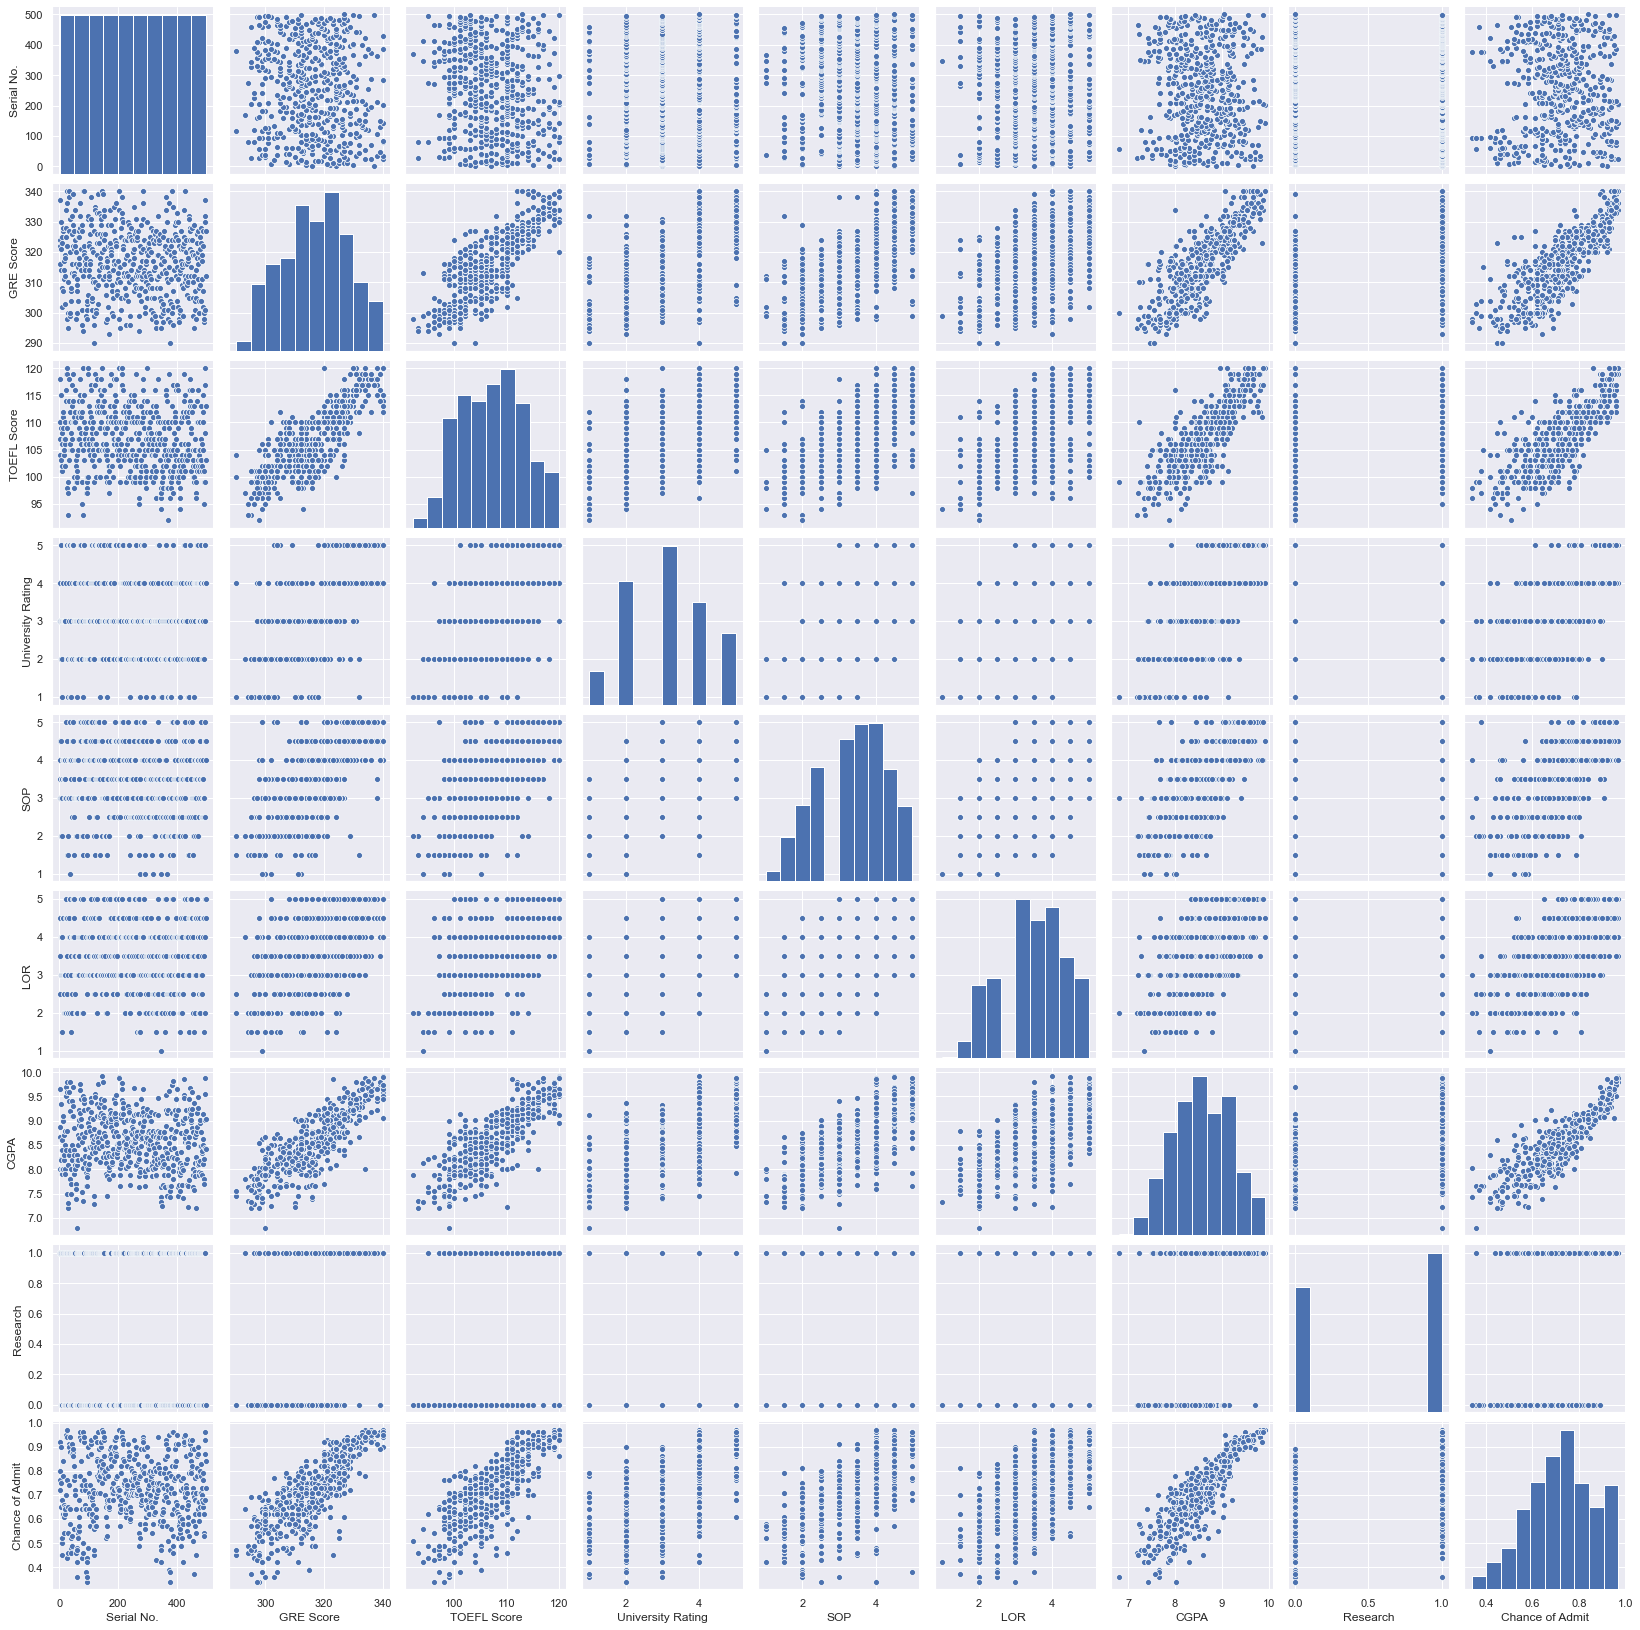

In [22]:
sns.pairplot(dataset)

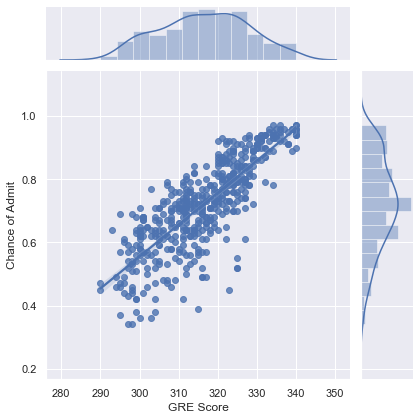

In [24]:
sns.jointplot('GRE Score','Chance of Admit',data=dataset,kind='reg')

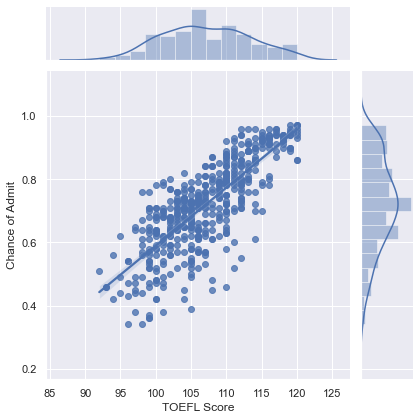

In [25]:
sns.jointplot('TOEFL Score','Chance of Admit',data=dataset,kind='reg')

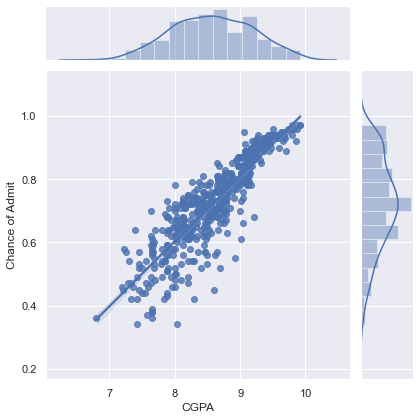

In [26]:
sns.jointplot('CGPA','Chance of Admit',data=dataset,kind='reg')

## Comments:

All Feature as all have relationship even not all are strong but still there is relationship beteen the data and all are distrbuted good and no many outliers.

Only need to do normalization (scalling) before train the modle as values are not in same range.

In [9]:
# Splitting the dataset into X and y
X = dataset.iloc[:, 1:8].values
y = dataset.iloc[:, 8].values

## Comment:
X: I will take all feature to predict admission except Serial number

y: It will be column for chance of admit

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [48]:
#Validation
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 0.003607889364229485
MAE: 0.04450852425272342
RMSE: 0.06006570872161158
r2_score: 0.7626117160137289


## Comment:

r2_score is 0.762611716 can be accepted compare to this domain 